In [2]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
from cartopy.feature import NaturalEarthFeature
import cartopy.crs as ccrs
import cartopy

data = Dataset('data/Land_and_Ocean_LatLong1.nc', mode='r')

In [3]:
%config InlineBackend.figure_format = 'retina'

In [4]:
lats = data.variables['latitude'][:]
longs = data.variables['longitude'][:]
time = data.variables['time'][:]
temp = data.variables['temperature'][:]

C:\Users\Derevirn\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: WARNING: valid_min not used since it
cannot be safely cast to variable data type
  after removing the cwd from sys.path.
C:\Users\Derevirn\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: WARNING: valid_max not used since it
cannot be safely cast to variable data type
  after removing the cwd from sys.path.


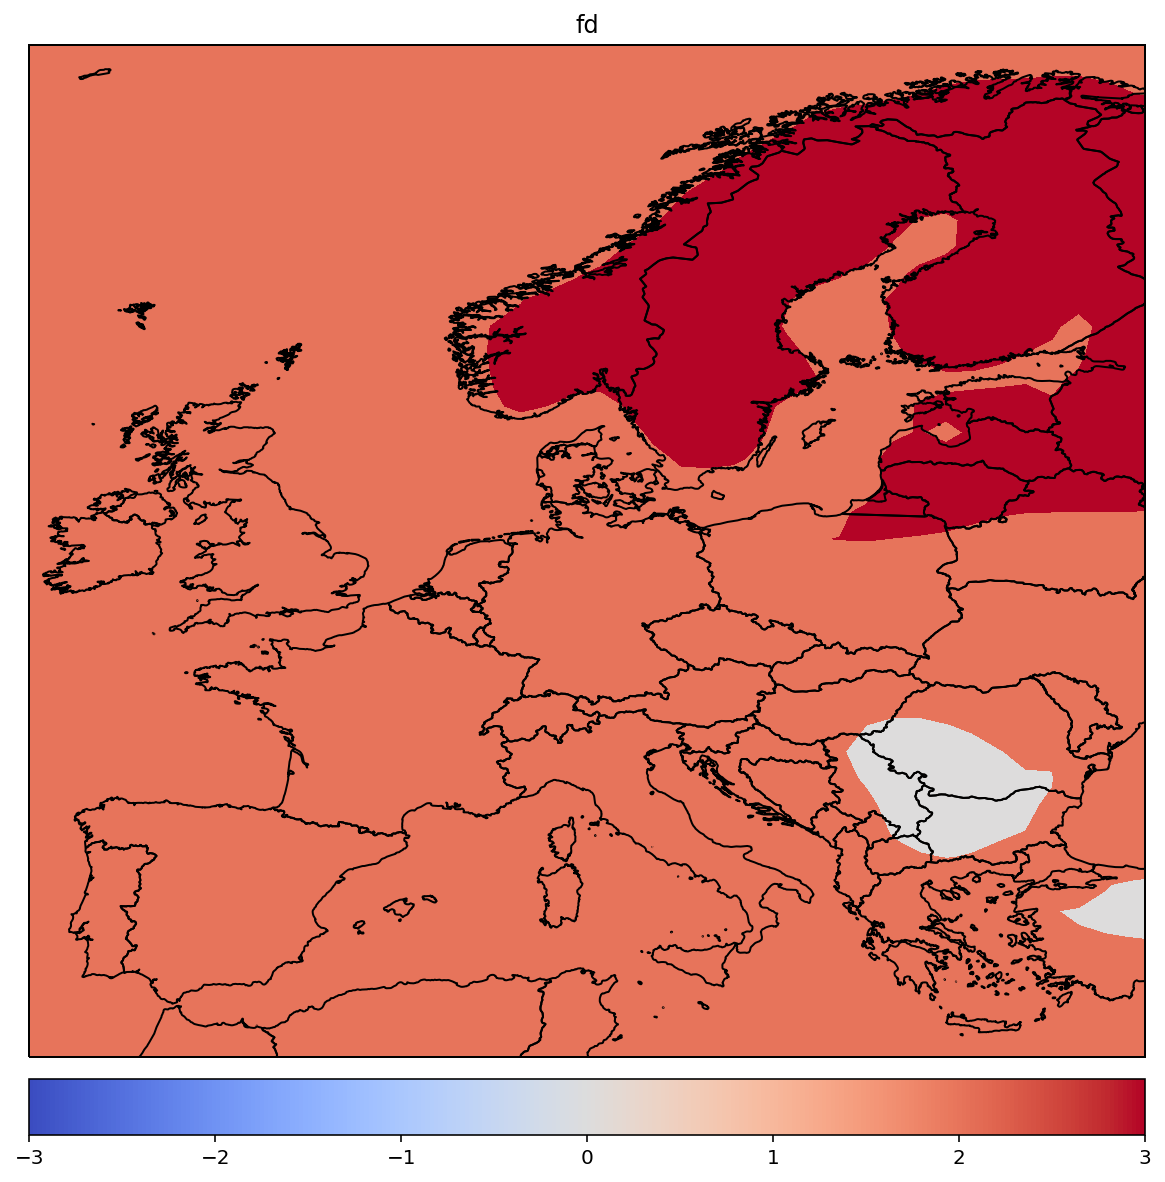

In [215]:
cmap = 'coolwarm'
vmin = -3
vmax = 3

fig = plt.figure(figsize=(10,20))
ax = fig.add_subplot(projection=ccrs.PlateCarree())
ax.set_title("fd")
ax.add_feature(NaturalEarthFeature('cultural', 'admin_0_countries', '10m'),
               facecolor='none', edgecolor='black')
ax.set_extent([-11, 31, 34, 71])

sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))

plt.colorbar(sm, ax=ax, orientation='horizontal', fraction=0.05, pad=0.01)
plt.contourf(longs, lats, temp[2050], cmap=cmap, vmax=vmax,
             transform=ccrs.PlateCarree())
plt.show()   


In [218]:
def create_maps(lst):
    cmap = 'coolwarm'
    vmin = -3
    vmax = 3

    for i in range(lst[0], lst[1]):
        fig = plt.figure(figsize=(10,20))
        ax = fig.add_subplot(projection=ccrs.PlateCarree())
        ax.set_title("Anomaly Temp")
        ax.add_feature(NaturalEarthFeature('cultural', 'admin_0_countries', '10m'),
                       facecolor='none', edgecolor='black')
        ax.set_extent([-11, 31, 34, 71])

        sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))

        plt.colorbar(sm, ax=ax, orientation='horizontal', fraction=0.05, pad=0.01)
        plt.contourf(longs, lats, temp[i], cmap=cmap, vmax=vmax,
                     transform=ccrs.PlateCarree())
        plt.savefig('img/temp_'+str(i)+'.png', bbox_inches='tight')
        plt.close()


create_maps([1,100])

create_maps([1950,2050])


In [263]:
import xarray as xr
xr_df = xr.open_dataset('data/gistemp1200_GHCNv4_ERSSTv5.nc')

In [296]:
climate = xr_df.resample(time='Y').mean()

anomaly = climate['tempanomaly']

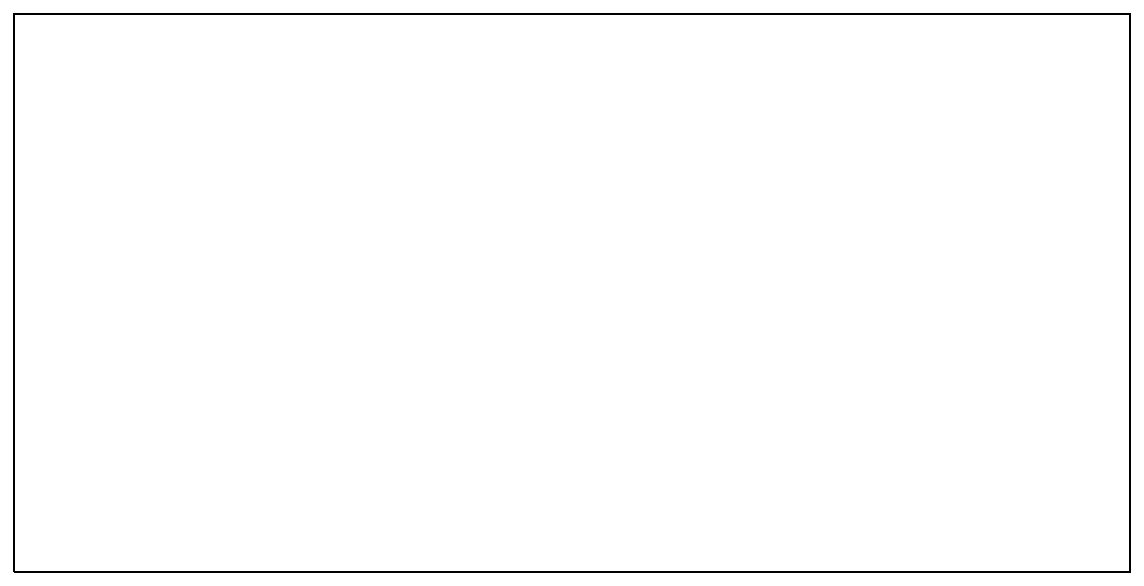

In [312]:
fig = plt.figure(figsize=(10,20))
ax = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())


